In [1]:
import pandas as pd

df = pd.read_csv('BTC_data_preprocessed.csv')

In [2]:
df.Date = pd.to_datetime(df.Date)

dfTS = df.set_index(df.Date)
dfTS.drop(['Date'], axis=1, inplace=True)

In [3]:
df

,Date,Close,Open,High,Low,Vol,Change
0,2018-09-13,6482.9,6338.0,6867.3,6337.8,3530000.0,2.29
1,2018-09-14,6483.7,6482.9,6579.4,6412.1,3200000.0,0.01
2,2018-09-15,6519.0,6482.6,6562.9,6470.3,3160000.0,0.54
3,2018-09-16,6500.2,6519.0,6520.8,6406.2,3340000.0,-0.29
4,2018-09-17,6251.9,6500.2,6533.5,6215.9,3260000.0,-3.82
...,...,...,...,...,...,...,...
1795,2023-08-13,29300.1,29428.2,29468.5,29272.3,13490.0,-0.44
1796,2023-08-14,29426.7,29300.1,29689.0,29116.0,39300.0,0.43
1797,2023-08-15,29195.3,29426.7,29472.0,29118.6,33810.0,-0.79
1798,2023-08-16,28726.3,29195.3,29251.1,28717.6,43710.0,-1.61


Preprocessing
Train/Test Split
Time Split for TRAIN
Time Split for TEST
Building RNN Model
Running the Model
Epoch 1/20
53/53 [==============================] - 12s 46ms/step - loss: 0.1817
Epoch 2/20
53/53 [==============================] - 2s 45ms/step - loss: 0.0594
Epoch 3/20
53/53 [==============================] - 2s 46ms/step - loss: 0.0460
Epoch 4/20
53/53 [==============================] - 2s 47ms/step - loss: 0.0441
Epoch 5/20
53/53 [==============================] - 3s 50ms/step - loss: 0.0390
Epoch 6/20
53/53 [==============================] - 2s 45ms/step - loss: 0.0329
Epoch 7/20
53/53 [==============================] - 2s 45ms/step - loss: 0.0303
Epoch 8/20
53/53 [==============================] - 2s 45ms/step - loss: 0.0309
Epoch 9/20
53/53 [==============================] - 2s 45ms/step - loss: 0.0280
Epoch 10/20
53/53 [==============================] - 2s 46ms/step - loss: 0.0274
Epoch 11/20
53/53 [==============================] - 2s 46ms/step - loss: 0.0277
Epoch 12

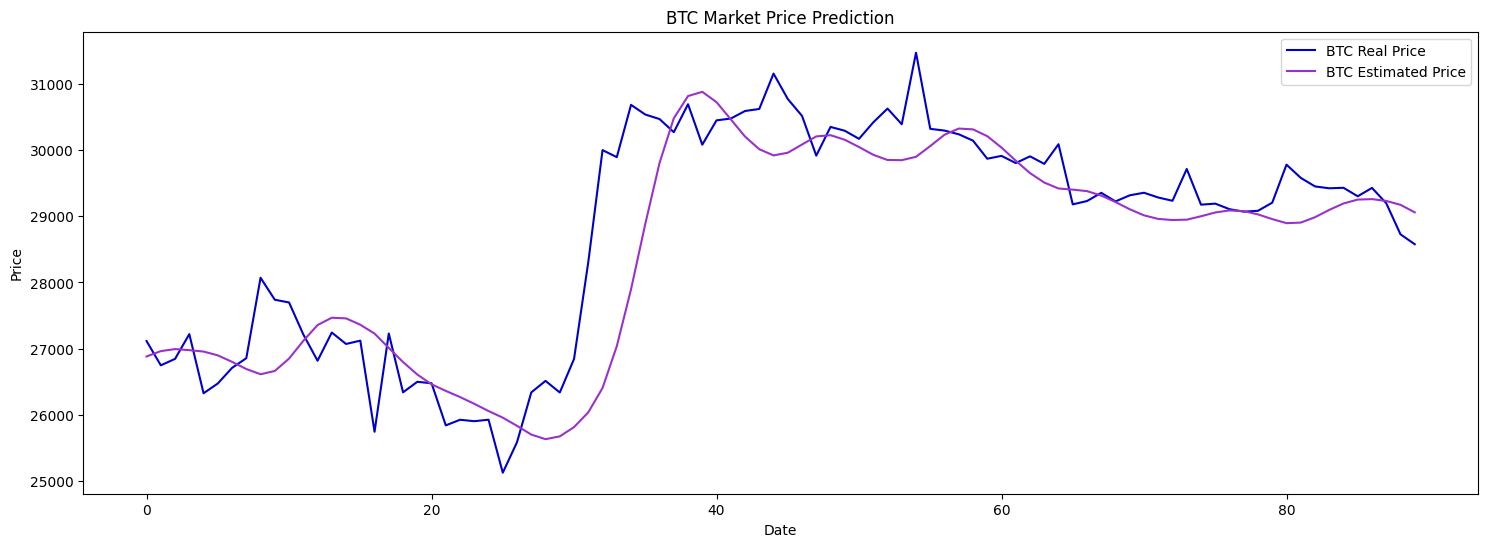

Evaluating Accuracy of the Model by Mean Percentage Error
-------------------- 
     real_price    pred_price  error_price  real_price_change  \
0      27116.2  26883.505859   232.694141             -366.3   
1      26749.9  26964.287109   214.387109               97.4   
2      26847.3  26994.748047   147.448047              373.4   
3      27220.7  26978.753906   241.946094             -892.3   
4      26328.4  26957.417969   629.017969              147.4   
..         ...           ...          ...                ...   
84     29428.2  29191.824219   236.375781             -128.1   
85     29300.1  29250.439453    49.660547              126.6   
86     29426.7  29257.513672   169.186328             -231.4   
87     29195.3  29229.871094    34.571094             -469.0   
88     28726.3  29171.394531   445.094531             -149.6   

    pred_price_change  error_price_change  real_pc_perc  pred_pc_perc  \
0           80.781250          447.081250     -1.350853      0.300486   
1   

In [4]:
from myPriceRegressor import My_Price_Regressor
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# df, target_col, test_num, time_steps, scaler,
my_price_regressor_object = My_Price_Regressor (
    df = df,
    target_col = 'Close',
    epoch = 20,
    test_num = 90,
    time_steps = 30,
    scaler = std_scaler,
    product='BTC'
)